**WhatsApp Chat Analysis using Python**

We can use WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks.
We can also find a lot of information from ones WhatsApp messages.

In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from google.colab import files
#uploaded = files.upload()
#conversation = 'WhatsApp Chat with Shristi.txt'



In [ ]:
 pip install emoji --upgrade

^C


In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
conversation = 'WhatsApp Chat with Shristi.txt'
data = []
conversation = 'WhatsApp Chat with Shristi.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with Shristi.txt to WhatsApp Chat with Shristi (2).txt


total number of messages between this WhatsApp chat:

WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date  ...                                            Message
818 2017-02-23  ...                                                Bol
819 2017-02-23  ...              Hotstar main video download hota hain
820 2017-02-23  ...                      Tanhaiya ka video download kr
821 2017-02-23  ...  Kya pta hm to hmesha direct vdeo dkhte hai hot...
822 2017-02-23  ...                            Kbhi dewnld ni kie usse
823 2017-02-23  ...                                   Tanhaiya kya hau
824 2017-02-23  ...                                            Episode
825 2017-02-23  ...                                             Serial
826 2017-02-23  ...                                           10 clips
827 2017-02-23  ...                                               Hain
828 2017-02-23  ...                                          Mast hain
829 2017-02-23  ...                                             Saayad
830 2017-02-23  ...                                          Serial😂😂😂
831 20

In [ ]:
total_messages = df.shape[0]
print(total_messages)

838


total number of media messages present in this chat:

In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

25


 extract the emojis present in between the chats and have a look at the emojis present in this chat

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


let’s extract the URLs present in this chat and have a look at the final insights

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Abhishikat and Shristi")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Abhishikat and Shristi
Total Messages:  838
Number of Media Shared:  25
Number of Emojis Shared 0
Number of Links Shared 0


prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Abhishikat", "Shristi"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Abhishikat -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Shristi -
Messages Sent 309
Average Words per message 3.9967637540453076
Media Messages Sent 1
Emojis Sent 0
Links Sent 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in long_scalars



prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

he most used words in this WhatsApp chat by visualizing a word cloud:

There are 12242 words in all the messages.


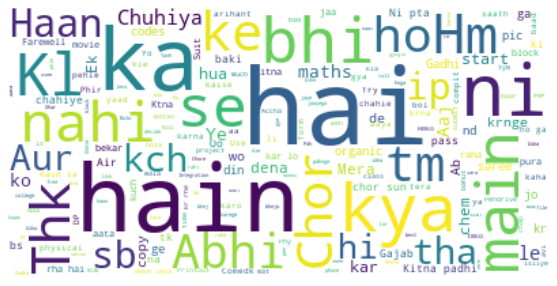

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()